In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [166]:
# df1 = pd.read_json('bucket1.json', lines = True)

In [167]:
# df2 = pd.read_json('bucket2.json', lines = True)

In [168]:
# df3 = pd.read_json('bucket3.json', lines = True)

In [169]:
# df1 = pd.read_json('bucket1.json', lines = True)
# df2 = pd.read_json('bucket2.json', lines = True)
# df3 = pd.read_json('bucket3.json', lines = True)
# df4 = pd.read_json('bucket4.json', lines = True)
# df5 = pd.read_json('bucket5.json', lines = True)

In [170]:
# df5 = pd.read_json('bucket5.json', lines = True)

In [171]:
# frames = [df1a, df2a, df3a]

# result = pd.concat(frames)

In [172]:
# f = df1.copy()
# s = df2.copy()
# t = df3.copy()
# fo = df4.copy()
# fi = df5.copy()

# cols = [f,s,t,fo,fi]

# comments_df = pd.concat(cols)

In [2]:
comments_df = pd.read_csv('/home/heather/galvanize/Capstone2/cleaned_comments.csv')

In [ ]:
# delete any line that doesnt have a label...something that no one has commented on
# or ID types of comments that no one engages with
# divide the data up into four separate datasets....one dataset where each article has at least one...then make a multilabel predictor
# cluster the information that people find funny and like...funny and sad...wow and sad
# refression or classification? how many likes or is it likely to get any likes at all

In [7]:
#drop all values that have no funny,wow,sad...
# sentiment_array = comments_df[['funny', 'wow', 'sad', 'disagree', 'likes']]
# cleaned_df = comments_df.loc[~(sentiment_array==0).all(axis=1)].reset_index()

In [45]:
# new_s_df = cleaned_df[['funny', 'wow', 'sad', 'disagree', 'likes']]

# idx_non_zero = []
# for i in new_s_df[:10].values:
#     if sum(i) != 0:
#         idx_non_zero.append(i)


In [10]:
comments_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
comments_df.head()

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,haha you guys are a bunch of losers.,2,rejected,2006,59856,0,0,1,NaN,2015-09-29,10
1,0,0,How can the author claim that Star Wars is bet...,22,approved,59527,282338,0,0,1,NaN,2015-09-29,16
2,0,0,I agree 100% with everything here. Bruce Campb...,111,approved,32846,240372,0,0,1,NaN,2015-09-29,16
3,0,0,"While I disagree about ""The Phantom Menace,"" t...",111,approved,32846,240387,0,0,1,NaN,2015-09-29,16
4,0,0,"I agree, but only 99%.",111,approved,32846,240373,0,0,1,240372.0,2015-09-29,16


In [5]:
comments_df[comments_df.text.isna()]

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time


In [14]:
# comments_df.drop(index = 736029, axis = 0, inplace = True)

In [7]:
# ordered = comments_df.sort_values(by='created_at')

In [8]:
# pd.to_datetime(ordered.created_at[0])

In [48]:
# ordered['created'] = [pd.to_datetime(dt).date() for dt in ordered['created_at']]


KeyboardInterrupt: 

In [9]:
# ordered['created'] = [dt.date() for dt in ordered['created']]

In [11]:
comments_df.tail(1)

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
1223657,0,0,Secrecy is an internal component of the TPP. E...,54,approved,399437,6333090,0,0,1,6331916.0,2017-11-10,22


In [104]:
# tot = ordered.groupby('created').sum()

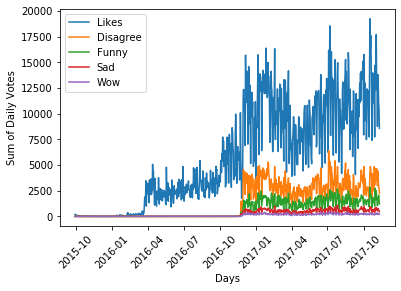

In [105]:
plt.plot(tot.likes, label = 'Likes')
plt.plot(tot.disagree, label = 'Disagree')
plt.plot(tot.funny, label = 'Funny')
plt.plot(tot.sad, label = 'Sad')
plt.plot(tot.wow, label = 'Wow')
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Sum of Daily Votes')
plt.legend()
# plt.savefig('ratings_per_day')
# around February of 2016 we have our first instances of ratings other than likes

In [83]:
# tot2 = ordered.groupby('created').count()

(array([160189., 342831., 205037., 133841.,  91708.,  64189.,  46928.,
         35136.,  26779.,  20506.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

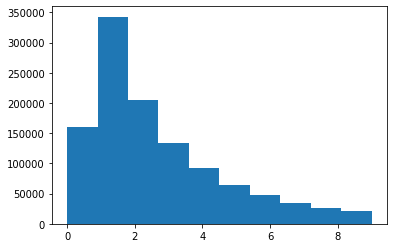

In [99]:
plt.hist(ordered[ordered.likes <10].likes)

In [47]:
#keep funny wow text vectorized 
# comments_df.rating.replace('rejected', 0, inplace = True)
# comments_df.rating.replace('approved', 1, inplace = True)


In [48]:
comments_df.fillna(value=0, inplace = True)

In [67]:
# comments_df[comments_df.parent_id != 0].parent_id

In [84]:
comments_df[comments_df.rating == 0]

,Unnamed: 0,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,0,haha you guys are a bunch of losers.,2,0,2006,59856,0,0,1,0.0,2015-09-29,10
32,32,0,0,I want to see what happens to spammy comments ...,111,0,32846,240408,0,0,1,0.0,2015-09-29,19
299,299,0,0,OH GREAT ANOTHER PERSON MOVING TO LA TO RUIN T...,6,0,33231,240652,0,0,1,0.0,2016-01-22,21
452,452,0,0,"Perhaps you should spell check, prior to posti...",6,0,34427,241085,0,0,1,1.0,2016-01-28,17
458,458,0,0,"Re: ""In Portland, a group of boaters actually ...",6,0,34877,241107,0,0,1,0.0,2016-01-28,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223426,1223426,0,0,Illegal immigrant praised by anti immigrant co...,21,0,399447,6332176,0,2,0,0.0,2017-11-10,20
1223433,1223433,0,0,Our military and their families love our First...,21,0,399447,6332200,0,0,1,0.0,2017-11-10,20
1223437,1223437,0,0,"However, when Trudeau aired our dirty laundry ...",54,0,399437,6332210,1,2,5,1.0,2017-11-10,20
1223446,1223446,0,0,....said the liberal bootlicker.,102,0,399436,6332242,0,0,1,1.0,2017-11-10,20


(array([91708.,     0., 64189.,     0., 46928.,     0., 35136.,     0.,
        26779., 20506.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. ]),
 <a list of 10 Patch objects>)

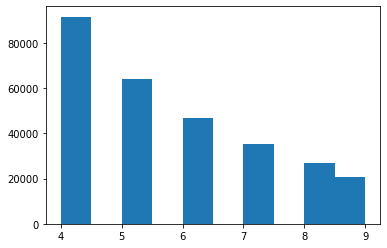

In [79]:
comments_df[comments_df.likes>= 4].likes.describe()
plt.hist(comments_df[(comments_df.likes>= 4) & (comments_df.likes<10)].likes)


,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time


,Unnamed: 0,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
0,0,0,0,haha you guys are a bunch of losers.,2,0,2006,59856,0,0,1,0.0,2015-09-29,10
1,1,0,0,How can the author claim that Star Wars is bet...,22,1,59527,282338,0,0,1,0.0,2015-09-29,16
2,2,0,0,I agree 100% with everything here. Bruce Campb...,111,1,32846,240372,0,0,1,0.0,2015-09-29,16
3,3,0,0,"While I disagree about ""The Phantom Menace,"" t...",111,1,32846,240387,0,0,1,0.0,2015-09-29,16
4,4,0,0,"I agree, but only 99%.",111,1,32846,240373,0,0,1,1.0,2015-09-29,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223653,1223653,0,0,"Marijuana is not medicine, but is an effective...",54,1,399451,6333022,0,0,1,0.0,2017-11-10,22
1223654,1223654,0,0,And another major reason for the deficits: 200...,54,1,399385,6333031,0,0,2,1.0,2017-11-10,22
1223655,1223655,1,0,"Man, I was thinking about becoming a stoner, b...",54,1,399451,6333040,0,0,0,1.0,2017-11-10,22
1223656,1223656,0,0,Sounds like you have a cushy government pension.,54,1,399385,6333055,0,0,1,1.0,2017-11-10,22


In [54]:
# comments_df.to_csv('../cleaned_comments.csv', index = False)

In [3]:
sample_df= comments_df.sample(frac=1/15, random_state=1)


In [4]:
sample_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
sample_df.head()

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created,created_time
417025,0,0,The fact is folks we need to generate revenue ...,21,1,167495,981119,0,4,9,1.0,2017-02-11,5
822725,1,0,Just look at Colorado's leftist leadership and...,102,1,354106,5579175,0,2,4,0.0,2017-07-12,15
43234,0,0,My heart aches for his family. He sounded like...,21,1,137546,329270,0,0,1,0.0,2016-05-27,14
436658,0,0,Neither political party is serious about reall...,21,1,169004,1013202,0,1,3,0.0,2017-02-18,17
313860,0,0,PragerU= fake news. Before anyone accepts anyt...,21,1,160869,816885,0,1,1,1.0,2017-01-10,4


In [ ]:
pd.get_dummies(sample_df, prefix='created', drop_first = True)

In [ ]:
sample_df.head()